In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv(r"C:\Users\pratk\Downloads\cancer.csv")

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
# checking for null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Binary Classification for Malignant and Benign Classification, removing uneccessary/repetitive Data
df['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
df = df[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']]
df['diagnosis_cat'] = df['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})
df

C:\Users\pratk\AppData\Local\Temp\ipykernel_4128\2797090030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diagnosis_cat'] = df['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.30010,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.08690,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.19740,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.24140,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.19800,0.1809,1 (malignant)
...,...,...,...,...,...,...,...,...,...
564,1,142.00,21.56,22.39,1479.0,0.11100,0.24390,0.1726,1 (malignant)
565,1,131.20,20.13,28.25,1261.0,0.09780,0.14400,0.1752,1 (malignant)
566,1,108.30,16.60,28.08,858.1,0.08455,0.09251,0.1590,1 (malignant)
567,1,140.10,20.60,29.33,1265.0,0.11780,0.35140,0.2397,1 (malignant)


In [7]:
df.head()

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   diagnosis        569 non-null    int64   
 1   perimeter_mean   569 non-null    float64 
 2   radius_mean      569 non-null    float64 
 3   texture_mean     569 non-null    float64 
 4   area_mean        569 non-null    float64 
 5   smoothness_mean  569 non-null    float64 
 6   concavity_mean   569 non-null    float64 
 7   symmetry_mean    569 non-null    float64 
 8   diagnosis_cat    569 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 36.4 KB


In [9]:
# Importing Data Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='diagnosis_cat', ylabel='count'>

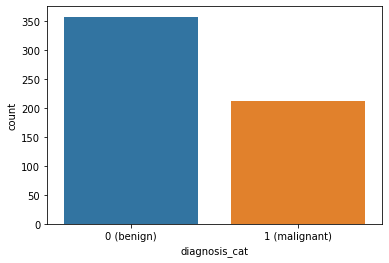

In [10]:
sns.countplot(x='diagnosis_cat', data=df)

<AxesSubplot:>

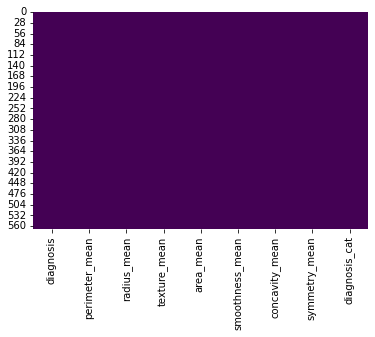

In [11]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

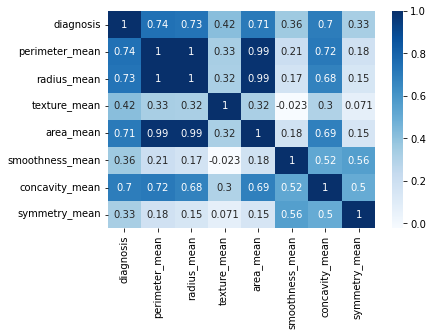

In [12]:
# Looking at the correlation of each metric to the classification
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [27]:
import math
mean = df['perimeter_mean'].sum()/len(df.index)
summation = 0
for i in df['perimeter_mean']:
    summation+=abs(mean - i)*abs(mean - i)
insqrt = summation/len(df.index)
CV = 100*math.sqrt(insqrt)/mean
CV

26.397601885840036

In [14]:
from sklearn.model_selection import train_test_split
X=df.drop('diagnosis', axis=1)
X=df.drop('diagnosis_cat', axis=1)
y=df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Changing the scales so all data types have equal weightage
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [16]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
pred_log = lr.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_test, pred_log)

array([[71,  0],
       [ 0, 43]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        43

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [22]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc=mlpc.predict(X_test)
print(classification_report(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        43

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

